# 01. Analysis Seoul CCTV

## 1. 데이터 읽기

In [127]:
import pandas as pd

In [128]:
CCTV_Seoul = pd.read_csv("../data/01. Seoul_CCTV.csv", encoding="utf-8")

In [129]:
# 데이터의 가장 상단 5개 데이터 읽기
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [130]:
# 데이터의 가장 하단 5개 데이터 읽기
CCTV_Seoul.tail()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
20,용산구,2096,1368,218,112,398
21,은평구,2108,1138,224,278,468
22,종로구,1619,464,314,211,630
23,중구,1023,413,190,72,348
24,중랑구,916,509,121,177,109


In [131]:
# 컬럼명 확인
CCTV_Seoul.columns[0]

'기관명'

In [132]:
# 컬럼명 변경
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0]: "구별"}, inplace=True) # inplace=True -> 변경된 내용 바로 저장

In [133]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [134]:
# 인구 데이터 가져오기
pop_Seoul = pd.read_excel("../data/01. Seoul_Population.xls")

In [135]:
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017,합계,4220082,10124579,4957857,5166722,9857426,4830206,5027220,267153,127651,139502,2.34,1365126
3,2017,종로구,73594,164257,80094,84163,154770,75967,78803,9487,4127,5360,2.1,26182
4,2017,중구,60412,134593,66337,68256,125709,62253,63456,8884,4084,4800,2.08,21384


In [136]:
# 원하는 데이터만 가져오기
pop_Seoul = pd.read_excel(
    "../data/01. Seoul_Population.xls", header=2, usecols="B, D, G, J, N"
)

In [137]:
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


In [138]:
# 컬럼명 변경
pop_Seoul.rename(
    columns={
        pop_Seoul.columns[0]: "구별",
        pop_Seoul.columns[1]: "인구수",
        pop_Seoul.columns[2]: "한국인",
        pop_Seoul.columns[3]: "외국인",
        pop_Seoul.columns[4]: "고령자"
    },
    inplace=True
)

pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


## 2. CCTV 데이터 탐색

In [139]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [140]:
CCTV_Seoul.tail()

,구별,소계,2013년도 이전,2014년,2015년,2016년
20,용산구,2096,1368,218,112,398
21,은평구,2108,1138,224,278,468
22,종로구,1619,464,314,211,630
23,중구,1023,413,190,72,348
24,중랑구,916,509,121,177,109


In [141]:
CCTV_Seoul.sort_values(by='소계', ascending=True).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,825,238,159,42,386
2,강북구,831,369,120,138,204
5,광진구,878,573,78,53,174
3,강서구,911,388,258,184,81
24,중랑구,916,509,121,177,109


In [142]:
CCTV_Seoul.sort_values(by='소계', ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
18,양천구,2482,1843,142,30,467
14,서초구,2297,1406,157,336,398
4,관악구,2109,846,260,390,613
21,은평구,2108,1138,224,278,468


In [143]:
CCTV_Seoul['최근증가율'] = (
    (CCTV_Seoul['2016년'] + CCTV_Seoul['2015년'] + CCTV_Seoul['2014년']) / CCTV_Seoul['2013년도 이전'] * 100
)

CCTV_Seoul.sort_values(by="최근증가율", ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1619,464,314,211,630,248.922414
9,도봉구,825,238,159,42,386,246.638655
12,마포구,980,314,118,169,379,212.101911
8,노원구,1566,542,57,451,516,188.929889
1,강동구,1010,379,99,155,377,166.490765


## 3. 인구현황 데이터 탐색

In [144]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


In [145]:
pop_Seoul.tail()

,구별,인구수,한국인,외국인,고령자
21,관악구,520929,503297,17632,70046
22,서초구,445401,441102,4299,53205
23,강남구,561052,556164,4888,65060
24,송파구,671173,664496,6677,76582
25,강동구,440359,436223,4136,56161


In [146]:
pop_Seoul.drop([0], axis=0, inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273
5,광진구,372298,357703,14595,43953


In [147]:
# 중복되는 값을 하나도 인식해 데이터 보여줌
pop_Seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [148]:
len(pop_Seoul['구별'].unique())

25

In [149]:
# 외국인비율, 고령자비율 컬럼 추가
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,164257,154770,9487,26182,5.775705,15.939656
2,중구,134593,125709,8884,21384,6.600640,15.887899
3,용산구,244444,229161,15283,36882,6.252148,15.088118
4,성동구,312711,304808,7903,41273,2.527254,13.198448
5,광진구,372298,357703,14595,43953,3.920247,11.805865


In [150]:
pop_Seoul.sort_values(['인구수'], ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,671173,664496,6677,76582,0.994825,11.410173
16,강서구,608255,601691,6564,76032,1.079153,12.500021
23,강남구,561052,556164,4888,65060,0.871220,11.596073
11,노원구,558075,554403,3672,74243,0.657976,13.303409
21,관악구,520929,503297,17632,70046,3.384722,13.446362


In [151]:
pop_Seoul.sort_values(['외국인'], ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402024,368550,33474,53981,8.326369,13.427308
17,구로구,441559,410742,30817,58794,6.979135,13.315095
18,금천구,253491,235154,18337,34170,7.233787,13.479769
21,관악구,520929,503297,17632,70046,3.384722,13.446362
6,동대문구,366011,350647,15364,55718,4.197688,15.223040


In [152]:
pop_Seoul.sort_values(['외국인비율'], ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402024,368550,33474,53981,8.326369,13.427308
18,금천구,253491,235154,18337,34170,7.233787,13.479769
17,구로구,441559,410742,30817,58794,6.979135,13.315095
2,중구,134593,125709,8884,21384,6.600640,15.887899
3,용산구,244444,229161,15283,36882,6.252148,15.088118


In [153]:
pop_Seoul.sort_values(['고령자'], ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,671173,664496,6677,76582,0.994825,11.410173
16,강서구,608255,601691,6564,76032,1.079153,12.500021
12,은평구,491202,486794,4408,74559,0.897390,15.178888
11,노원구,558075,554403,3672,74243,0.657976,13.303409
21,관악구,520929,503297,17632,70046,3.384722,13.446362


In [154]:
pop_Seoul.sort_values(['고령자비율'], ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,328002,324479,3523,56530,1.074079,17.234651
1,종로구,164257,154770,9487,26182,5.775705,15.939656
2,중구,134593,125709,8884,21384,6.600640,15.887899
10,도봉구,346234,344166,2068,53488,0.597284,15.448512
6,동대문구,366011,350647,15364,55718,4.197688,15.223040


## 두 데이터 합치기

In [155]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul)
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,150.619195,561052,556164,4888,65060,0.871220,11.596073
1,강동구,1010,379,99,155,377,166.490765,440359,436223,4136,56161,0.939234,12.753458
2,강북구,831,369,120,138,204,125.203252,328002,324479,3523,56530,1.074079,17.234651
3,강서구,911,388,258,184,81,134.793814,608255,601691,6564,76032,1.079153,12.500021
4,관악구,2109,846,260,390,613,149.290780,520929,503297,17632,70046,3.384722,13.446362


In [156]:
# 연도별 데이터 컬럼 삭제 -> del, drop
del data_result['2013년도 이전']
del data_result['2014년']

data_result.drop(['2015년', '2016년'], axis=True)

data_result.head()

,구별,소계,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,584,932,150.619195,561052,556164,4888,65060,0.871220,11.596073
1,강동구,1010,155,377,166.490765,440359,436223,4136,56161,0.939234,12.753458
2,강북구,831,138,204,125.203252,328002,324479,3523,56530,1.074079,17.234651
3,강서구,911,184,81,134.793814,608255,601691,6564,76032,1.079153,12.500021
4,관악구,2109,390,613,149.290780,520929,503297,17632,70046,3.384722,13.446362


In [157]:
# 인덱스 변경 -> set_index() : 선택한 컬럼을 DataFrame의 인덱스로 지정
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,,,
강남구,3238,584,932,150.619195,561052,556164,4888,65060,0.871220,11.596073
강동구,1010,155,377,166.490765,440359,436223,4136,56161,0.939234,12.753458
강북구,831,138,204,125.203252,328002,324479,3523,56530,1.074079,17.234651
강서구,911,184,81,134.793814,608255,601691,6564,76032,1.079153,12.500021
관악구,2109,390,613,149.290780,520929,503297,17632,70046,3.384722,13.446362


In [158]:
# 상관계수 -> corr() : correlation의 약자 / 연산이 가능한 int와 float 타입만 가능함
data_result.corr()

,소계,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
소계,1.000000,0.602008,0.720326,-0.264378,0.232555,0.227852,0.030421,0.163905,-0.045956,-0.267841
2015년,0.602008,1.000000,0.513767,0.112479,0.355757,0.351041,0.006338,0.358242,-0.133216,-0.211442
2016년,0.720326,0.513767,1.000000,0.312985,0.133917,0.135058,-0.044928,0.058096,-0.017484,-0.143636
최근증가율,-0.264378,0.112479,0.312985,1.000000,-0.097165,-0.086341,-0.156421,-0.072251,-0.047102,0.190396
인구수,0.232555,0.355757,0.133917,-0.097165,1.000000,0.998151,-0.167243,0.936737,-0.601076,-0.637414
한국인,0.227852,0.351041,0.135058,-0.086341,0.998151,1.000000,-0.226853,0.936155,-0.645463,-0.628360
외국인,0.030421,0.006338,-0.044928,-0.156421,-0.167243,-0.226853,1.000000,-0.175318,0.838612,-0.021147
고령자,0.163905,0.358242,0.058096,-0.072251,0.936737,0.936155,-0.175318,1.000000,-0.620300,-0.348840
외국인비율,-0.045956,-0.133216,-0.017484,-0.047102,-0.601076,-0.645463,0.838612,-0.620300,1.000000,0.242816
고령자비율,-0.267841,-0.211442,-0.143636,0.190396,-0.637414,-0.628360,-0.021147,-0.348840,0.242816,1.000000


In [159]:
data_result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 강남구 to 중랑구
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   소계      25 non-null     int64  
 1   2015년   25 non-null     int64  
 2   2016년   25 non-null     int64  
 3   최근증가율   25 non-null     float64
 4   인구수     25 non-null     int64  
 5   한국인     25 non-null     int64  
 6   외국인     25 non-null     int64  
 7   고령자     25 non-null     int64  
 8   외국인비율   25 non-null     float64
 9   고령자비율   25 non-null     float64
dtypes: float64(3), int64(7)
memory usage: 2.1+ KB


In [160]:
# CCTV 비율 컬럼 추가
data_result['CCTV비율'] = data_result['소계'] / data_result['인구수'] * 100
data_result.head()

,소계,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,,,
강남구,3238,584,932,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,155,377,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,138,204,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,184,81,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,390,613,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


In [161]:
data_result.sort_values(by='CCTV비율', ascending=True).head()

,소계,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,,,
강서구,911,184,81,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
송파구,1081,68,463,104.347826,671173,664496,6677,76582,0.994825,11.410173,0.161061
중랑구,916,177,109,79.960707,412780,408226,4554,59262,1.103251,14.356800,0.221910
강동구,1010,155,377,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
광진구,878,53,174,53.228621,372298,357703,14595,43953,3.920247,11.805865,0.235833


In [162]:
data_result.sort_values(by='CCTV비율', ascending=False).head()

,소계,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,,,
종로구,1619,211,630,248.922414,164257,154770,9487,26182,5.775705,15.939656,0.985651
용산구,2096,112,398,53.216374,244444,229161,15283,36882,6.252148,15.088118,0.857456
중구,1023,72,348,147.699758,134593,125709,8884,21384,6.600640,15.887899,0.760069
강남구,3238,584,932,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
금천구,1348,269,354,100.000000,253491,235154,18337,34170,7.233787,13.479769,0.531774


## 5. 데이터 시각화
### 소계 컬럼 시각화

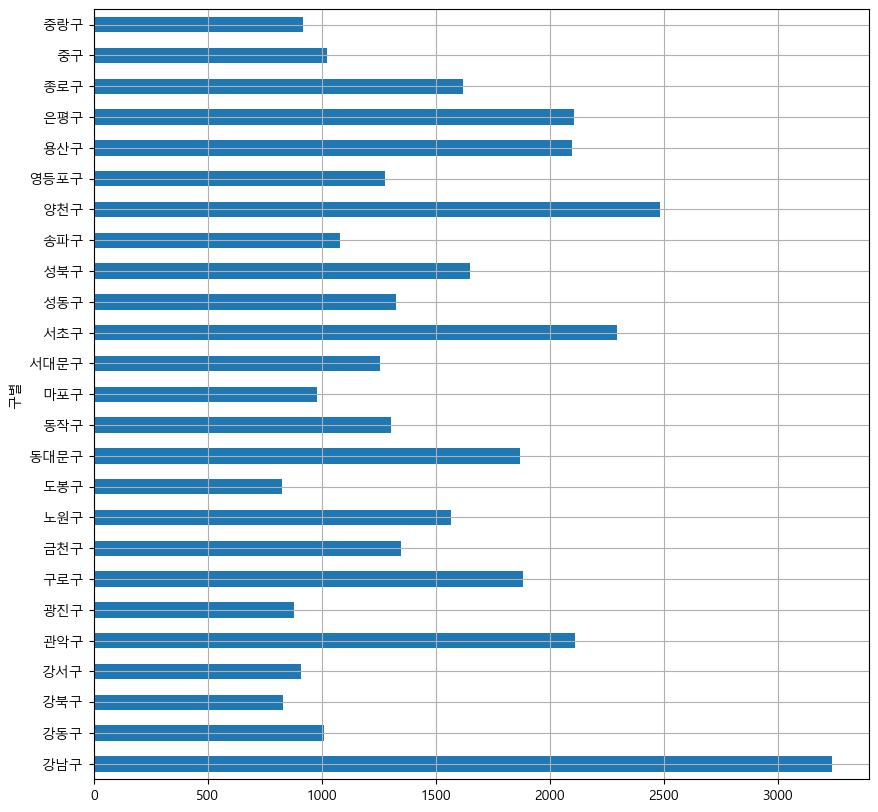

In [192]:
data_result["소계"].plot(kind="barh", grid=True, figsize=(10, 10));

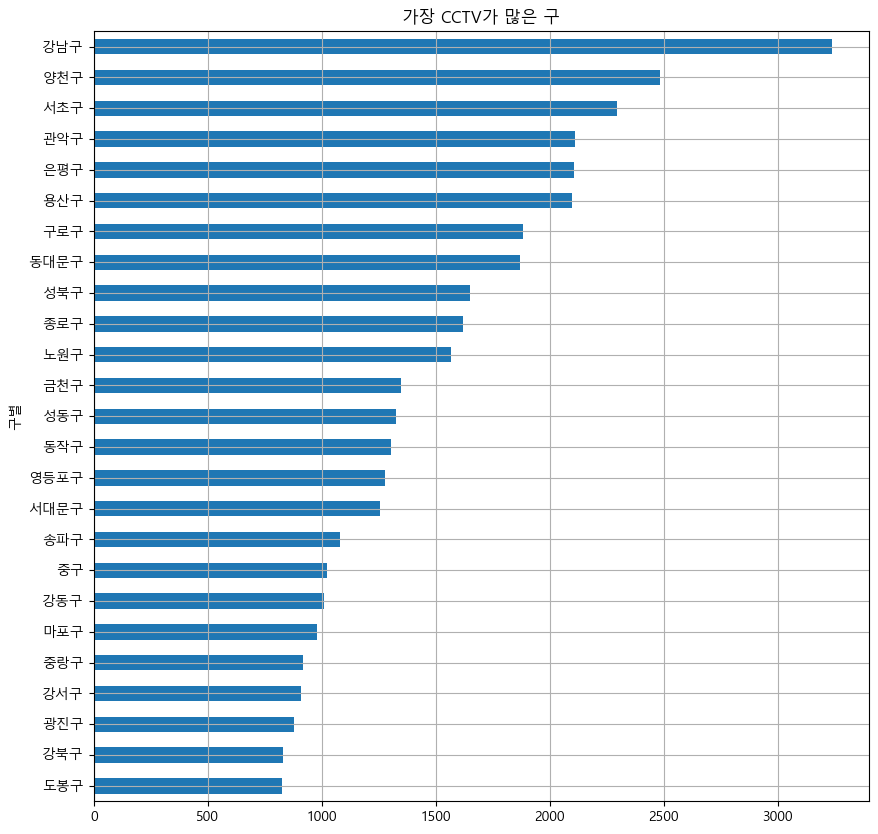

In [194]:
def drawGraph():
    data_result["소계"].sort_values().plot(
        kind="barh", grid=True, title="가장 CCTV가 많은 구", figsize=(10, 10)
    )

drawGraph()

### CCTV비율 컬럼 시각화

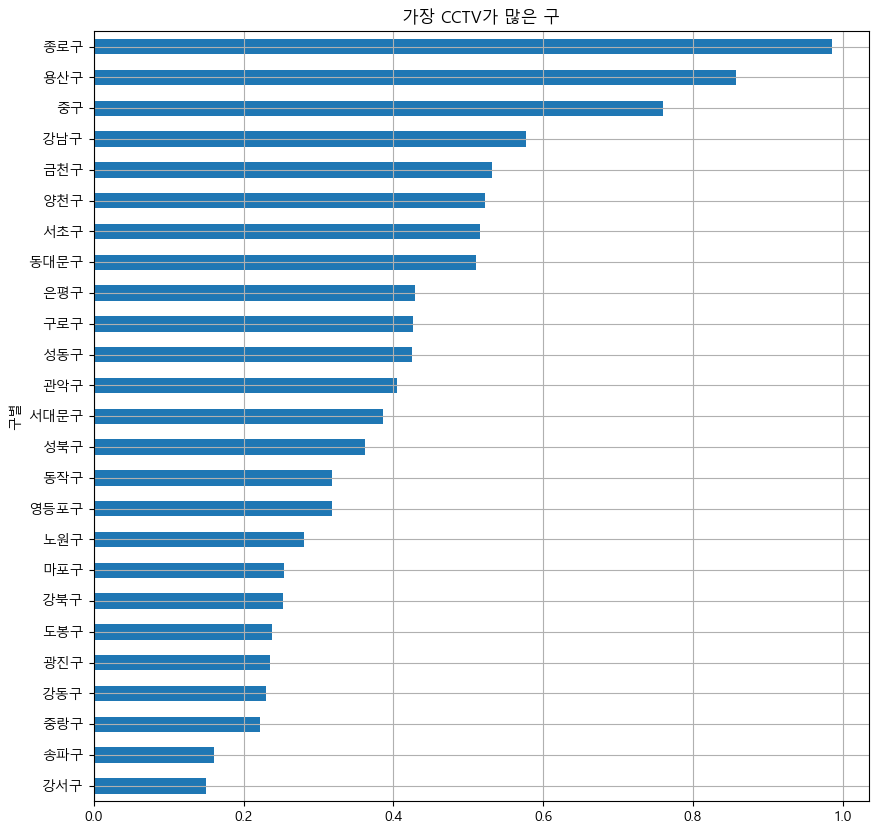

In [195]:
def drawGraph():
    data_result["CCTV비율"].sort_values().plot(
        kind="barh", grid=True, title="가장 CCTV가 많은 구", figsize=(10, 10)
    )
    
drawGraph()

## 6. 데이터 경향 파악
### 인구 수와 소계 컬럼으로 scatter plot 그리기 

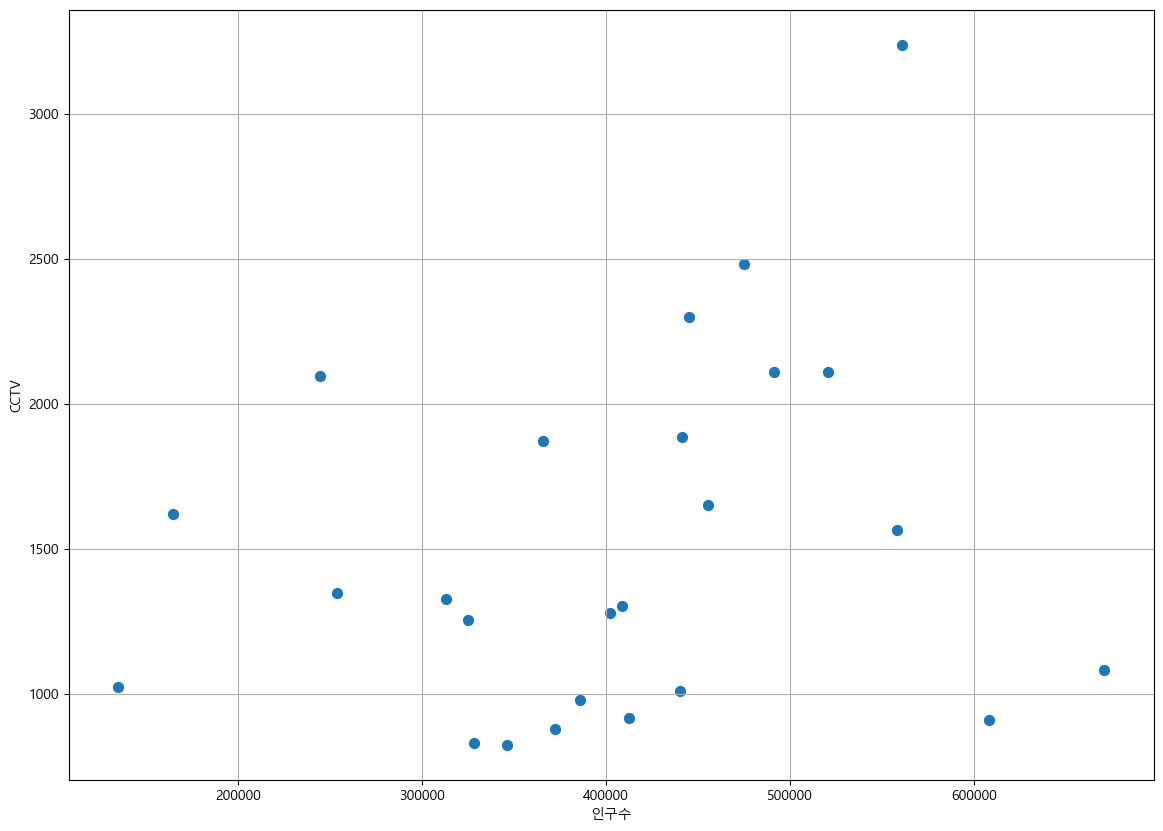

In [196]:
def drawGraph():
    
    plt.figure(figsize=(14, 10))
    plt.scatter(data_result["인구수"], data_result["소계"], s=50)
    plt.xlabel("인구수")
    plt.ylabel("CCTV")
    plt.grid(True)
    plt.show() 
    
drawGraph()

### Numpy를 이용한 1차 직선 만들기
- np.polyfit(): 직선을 구성하기 위한 계수 (기울기, y절편)를 계산
- np.poly1d(): polyfit 으로 찾은 계수로 파이썬에서 사용할 수 있는 함수로 만들어주는 기능

In [197]:
import numpy as np 

In [198]:
fp1 = np.polyfit(data_result["인구수"], data_result["소계"], 1)
fp1

array([1.11155868e-03, 1.06515745e+03])

In [199]:
f1 = np.poly1d(fp1)
f1

poly1d([1.11155868e-03, 1.06515745e+03])

In [200]:
# 인구가 40만인 구에서 서울시의 전체 경향에 맞는 적당한 CCTV 수는? 
f1(400000)

1509.7809252413338

In [201]:
# np.linspace(a, b, n): a부터 b까지 n개의 등간격 데이터 생성 
# 경향선을 그리기 위한 X 데이터 생성 : 100000부터 700000까지 100의 간격으로
fx = np.linspace(100000, 700000, 100)

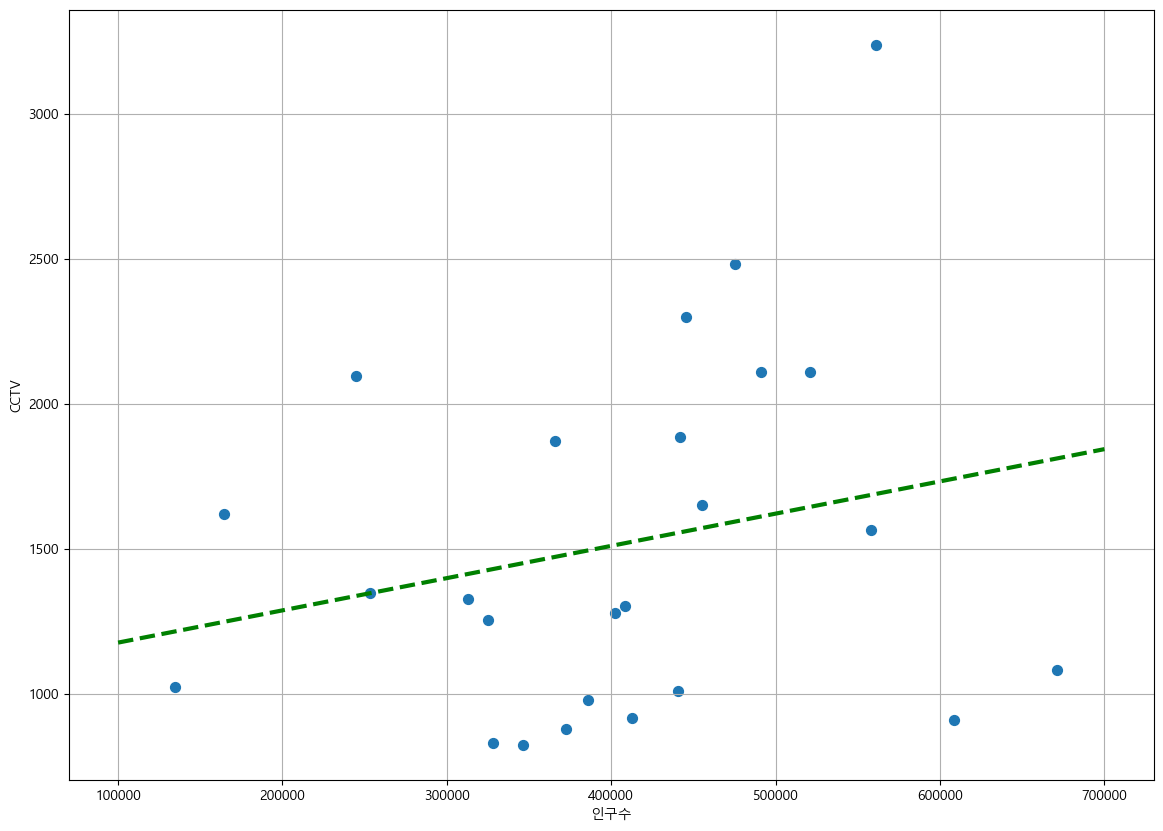

In [203]:
def drawGraph():
    
    plt.figure(figsize=(14, 10))

    # scatter plot
    plt.scatter(data_result["인구수"], data_result["소계"], s=50)

    # 경향선 : x 데이터 / y 데이터 / line style / line width / line color
    plt.plot(fx, f1(fx), ls="dashed", lw=3, color="g")

    plt.xlabel("인구수")
    plt.ylabel("CCTV")
    plt.grid(True)
    plt.show() 

drawGraph()

---

## Pandas 기초
- Python에서 R만큼의 강력한 데이터 핸들링 성능을 제공하는 모듈
- 단일 프로세스에서는 최대 효율
- 코딩 가능하고 응용 가능한 엑셀로 인식해도 됨
- 누군가는 스테로이드를 맞은 엑셀로 표현하기도 함

### Series 데이터
- index, value로 이루어져 있다.
- 한 가지 데이터 타입만 가질 수 있다.

In [163]:
import pandas as pd
import numpy as np

-  pandas는 통상 pd / numpy는 통상 np 라고 import 한다.

In [164]:
pd.Series()

Series([], dtype: object)

In [165]:
pd.Series([1, 2, 3, 4])

0    1
1    2
2    3
3    4
dtype: int64

In [174]:
pd.Series([1, 2, 3, 4], dtype=float64)

NameError: name 'float64' is not defined

In [167]:
pd.Series([1, 2, 3, 4], dtype=np.float64)

0    1.0
1    2.0
2    3.0
3    4.0
dtype: float64

In [168]:
pd.Series([1, 2, 3, 4], dtype=str)

0    1
1    2
2    3
3    4
dtype: object

In [169]:
pd.Series([1, 2, 3, 4], dtype=np.float64)

0    1.0
1    2.0
2    3.0
3    4.0
dtype: float64

In [170]:
pd.Series(np.array([1, 2, 3]))

0    1
1    2
2    3
dtype: int32

In [171]:
pd.Series({"Key": "Value"})

Key    Value
dtype: object

In [172]:
data = pd.Series([1, 2, 3, 4, "5"])
data

0    1
1    2
2    3
3    4
4    5
dtype: object

In [173]:
# 짝수 찾기
data & 2

TypeError: Cannot perform 'and_' with a dtyped [object] array and scalar of type [bool]

In [ ]:
data = pd.Series([1, 2, 3, 4])
data

0    1
1    2
2    3
3    4
dtype: int64

In [ ]:
# 짝수 찾기
data % 2

0    1
1    0
2    1
3    0
dtype: int64

### 날짜 데이터

In [ ]:
pd.date_range("20210101", periods=6)

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06'],
              dtype='datetime64[ns]', freq='D')

### DataFrame
- index, value, column로 이루어져 있다.
- DataFrame은 Series 데이터타입들이 모여 이루어진 것이다

In [ ]:
# 표준정규분포에서 랜덤하게 샘플링한 난수 생성
data = np.random.randn(6, 4)
data

array([[ 0.31659615,  0.55700702,  0.42805579, -0.42844389],
       [ 2.58744272,  1.1928059 , -0.38508774, -0.14342242],
       [ 1.24516738,  0.18617449,  1.05867069,  0.53176694],
       [-1.47598463, -0.42754302, -1.97985728,  1.9798311 ],
       [-2.56892668, -2.84343434, -1.56941788, -0.10687329],
       [ 0.52028644,  0.4015004 , -0.80454558,  0.17467407]])

In [ ]:
index = pd.date_range("20210101", periods=6)
index

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
df = pd.DataFrame(data, index, columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
2021-01-01,0.316596,0.557007,0.428056,-0.428444
2021-01-02,2.587443,1.192806,-0.385088,-0.143422
2021-01-03,1.245167,0.186174,1.058671,0.531767
2021-01-04,-1.475985,-0.427543,-1.979857,1.979831
2021-01-05,-2.568927,-2.843434,-1.569418,-0.106873
2021-01-06,0.520286,0.401500,-0.804546,0.174674


#### DataFrame 정보 탐색

In [ ]:
df.head()

,A,B,C,D
2021-01-01,0.316596,0.557007,0.428056,-0.428444
2021-01-02,2.587443,1.192806,-0.385088,-0.143422
2021-01-03,1.245167,0.186174,1.058671,0.531767
2021-01-04,-1.475985,-0.427543,-1.979857,1.979831
2021-01-05,-2.568927,-2.843434,-1.569418,-0.106873


In [ ]:
df.tail()

,A,B,C,D
2021-01-02,2.587443,1.192806,-0.385088,-0.143422
2021-01-03,1.245167,0.186174,1.058671,0.531767
2021-01-04,-1.475985,-0.427543,-1.979857,1.979831
2021-01-05,-2.568927,-2.843434,-1.569418,-0.106873
2021-01-06,0.520286,0.401500,-0.804546,0.174674


In [ ]:
df.index

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [ ]:
df.values

array([[ 0.31659615,  0.55700702,  0.42805579, -0.42844389],
       [ 2.58744272,  1.1928059 , -0.38508774, -0.14342242],
       [ 1.24516738,  0.18617449,  1.05867069,  0.53176694],
       [-1.47598463, -0.42754302, -1.97985728,  1.9798311 ],
       [-2.56892668, -2.84343434, -1.56941788, -0.10687329],
       [ 0.52028644,  0.4015004 , -0.80454558,  0.17467407]])

In [ ]:
# 데이터 프레임의 기본 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2021-01-01 to 2021-01-06
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      float64
dtypes: float64(4)
memory usage: 240.0 bytes


In [ ]:
# 데이터 프레임의 기술 통계 정보 확인
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.104097,-0.155582,-0.542030,0.334589
std,1.861673,1.417856,1.159287,0.869123
min,-2.568927,-2.843434,-1.979857,-0.428444
25%,-1.027839,-0.274114,-1.378200,-0.134285
50%,0.418441,0.293837,-0.594817,0.033900
75%,1.063947,0.518130,0.224770,0.442494
max,2.587443,1.192806,1.058671,1.979831


#### DataFrame 데이터 정렬

In [ ]:
# 특정 컬럼 (열)을 기준으로 데이터 정렬
df.sort_values(by="B", ascending=False, inplace=True) # B 컬럼을 기준으로 내림차순으로 데이터 정렬한 후 변경 상태 저장

In [ ]:
df

,A,B,C,D
2021-01-02,2.587443,1.192806,-0.385088,-0.143422
2021-01-01,0.316596,0.557007,0.428056,-0.428444
2021-01-06,0.520286,0.401500,-0.804546,0.174674
2021-01-03,1.245167,0.186174,1.058671,0.531767
2021-01-04,-1.475985,-0.427543,-1.979857,1.979831
2021-01-05,-2.568927,-2.843434,-1.569418,-0.106873


#### DataFrame 데이터 선택

In [ ]:
# 한 개의 컬럼 선택 -> 반환 타입 = Series
df['A']

2021-01-02    2.587443
2021-01-01    0.316596
2021-01-06    0.520286
2021-01-03    1.245167
2021-01-04   -1.475985
2021-01-05   -2.568927
Name: A, dtype: float64

In [ ]:
type(df['A'])

pandas.core.series.Series

In [ ]:
# 컬럼명이 숫자가 아닌 문자열일 경우, 더 간단한 방법으로 열을 선택할 수 있다.
df.A

2021-01-02    2.587443
2021-01-01    0.316596
2021-01-06    0.520286
2021-01-03    1.245167
2021-01-04   -1.475985
2021-01-05   -2.568927
Name: A, dtype: float64

In [ ]:
# 두 개 이상 컬럼 선택 -> 반환 타입 = DataFrame
df[['A', 'B']]

,A,B
2021-01-02,2.587443,1.192806
2021-01-01,0.316596,0.557007
2021-01-06,0.520286,0.401500
2021-01-03,1.245167,0.186174
2021-01-04,-1.475985,-0.427543
2021-01-05,-2.568927,-2.843434


#### DataFrame 데이터 슬라이싱
- offset index : [n:m] : n부터 m-1까지
    - 숫자가 아닌 인덱스나 컬럼의 이름으로 슬라이싱할 경우, 끝 데이터를 포함한다.

In [ ]:
df = pd.DataFrame(data, index, columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
2021-01-01,0.316596,0.557007,0.428056,-0.428444
2021-01-02,2.587443,1.192806,-0.385088,-0.143422
2021-01-03,1.245167,0.186174,1.058671,0.531767
2021-01-04,-1.475985,-0.427543,-1.979857,1.979831
2021-01-05,-2.568927,-2.843434,-1.569418,-0.106873
2021-01-06,0.520286,0.401500,-0.804546,0.174674


In [ ]:
df[0:3]

,A,B,C,D
2021-01-01,0.316596,0.557007,0.428056,-0.428444
2021-01-02,2.587443,1.192806,-0.385088,-0.143422
2021-01-03,1.245167,0.186174,1.058671,0.531767


In [ ]:
df["20210101":"20210104"] # 데이터가 정렬된 상황에서만 가능

,A,B,C,D
2021-01-01,0.316596,0.557007,0.428056,-0.428444
2021-01-02,2.587443,1.192806,-0.385088,-0.143422
2021-01-03,1.245167,0.186174,1.058671,0.531767
2021-01-04,-1.475985,-0.427543,-1.979857,1.979831


In [ ]:
# loc: location의 약자 / index 이름으로 특정 행, 열 선택
df.loc[:, ["A", "B"]] # 전체 행, A & B 컬럼 선택

,A,B
2021-01-01,0.316596,0.557007
2021-01-02,2.587443,1.192806
2021-01-03,1.245167,0.186174
2021-01-04,-1.475985,-0.427543
2021-01-05,-2.568927,-2.843434
2021-01-06,0.520286,0.401500


In [ ]:
df.loc['20210102':'20210104', ['A', 'D']]

,A,D
2021-01-02,2.587443,-0.143422
2021-01-03,1.245167,0.531767
2021-01-04,-1.475985,1.979831


In [ ]:
df.loc['20210102':'20210104', 'A':'D']

,A,B,C,D
2021-01-02,2.587443,1.192806,-0.385088,-0.143422
2021-01-03,1.245167,0.186174,1.058671,0.531767
2021-01-04,-1.475985,-0.427543,-1.979857,1.979831


In [ ]:
# iloc : integer location의 약자 / 컴퓨터가 인식하는 인덱스 값으로 선택
df.iloc[3] # 3번째 행 선택

A   -1.475985
B   -0.427543
C   -1.979857
D    1.979831
Name: 2021-01-04 00:00:00, dtype: float64

In [ ]:
df.iloc[3, 2]

-1.9798572819782592

In [ ]:
df.iloc[3:5, 0:2] # 마지막 인덱스 제외

,A,B
2021-01-04,-1.475985,-0.427543
2021-01-05,-2.568927,-2.843434


In [ ]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2021-01-02,2.587443,-0.385088
2021-01-03,1.245167,1.058671
2021-01-05,-2.568927,-1.569418


#### 조건문으로 DataFrame 데이터 필터링

In [ ]:
# A 컬럼에서 0보다 큰 숫자만 필터링
df['A'] > 0

2021-01-01     True
2021-01-02     True
2021-01-03     True
2021-01-04    False
2021-01-05    False
2021-01-06     True
Freq: D, Name: A, dtype: bool

In [ ]:
# 전체 데이터에서 A 컬럼의 값이 0보다 큰 셀만 필터링
df[df['A'] > 0]

,A,B,C,D
2021-01-01,0.316596,0.557007,0.428056,-0.428444
2021-01-02,2.587443,1.192806,-0.385088,-0.143422
2021-01-03,1.245167,0.186174,1.058671,0.531767
2021-01-06,0.520286,0.401500,-0.804546,0.174674


In [ ]:
# 전체 데이터에서 0보다 큰 셀만 필터링 -> 해당되지 않는 값은 NaN (Not a Number)으로 표시
df[df > 0]

,A,B,C,D
2021-01-01,0.316596,0.557007,0.428056,NaN
2021-01-02,2.587443,1.192806,NaN,NaN
2021-01-03,1.245167,0.186174,1.058671,0.531767
2021-01-04,NaN,NaN,NaN,1.979831
2021-01-05,NaN,NaN,NaN,NaN
2021-01-06,0.520286,0.401500,NaN,0.174674


In [ ]:
# isin : 특정 요소가 있는지 확인
df['E'].isin(['two', 'five'])

2021-01-01    False
2021-01-02    False
2021-01-03     True
2021-01-04    False
2021-01-05    False
2021-01-06    False
Freq: D, Name: E, dtype: bool

In [ ]:
df[df['E'].isin(['two', 'five'])]

,A,B,C,D,E
2021-01-03,1.245167,0.186174,1.058671,0.531767,two


#### DataFrame 컬럼 추가
- 기존 컬럼이 없으면 추가
- 기존 컬럼이 있으면 수정

In [ ]:
df['E'] = ['zero', 'one', 'two', 'three', 'four', 'five']
df

,A,B,C,D,E
2021-01-01,0.316596,0.557007,0.428056,-0.428444,zero
2021-01-02,2.587443,1.192806,-0.385088,-0.143422,one
2021-01-03,1.245167,0.186174,1.058671,0.531767,two
2021-01-04,-1.475985,-0.427543,-1.979857,1.979831,three
2021-01-05,-2.568927,-2.843434,-1.569418,-0.106873,four
2021-01-06,0.520286,0.401500,-0.804546,0.174674,five


In [ ]:
df['E'] = ['zero', 'one', 'two', 'three', 'four', 'six']
df

,A,B,C,D,E
2021-01-01,0.316596,0.557007,0.428056,-0.428444,zero
2021-01-02,2.587443,1.192806,-0.385088,-0.143422,one
2021-01-03,1.245167,0.186174,1.058671,0.531767,two
2021-01-04,-1.475985,-0.427543,-1.979857,1.979831,three
2021-01-05,-2.568927,-2.843434,-1.569418,-0.106873,four
2021-01-06,0.520286,0.401500,-0.804546,0.174674,six


#### 특정 컬럼 제거
1. del
2. drop

In [ ]:
del df['E']
df

,A,B,C,D
2021-01-01,0.316596,0.557007,0.428056,-0.428444
2021-01-02,2.587443,1.192806,-0.385088,-0.143422
2021-01-03,1.245167,0.186174,1.058671,0.531767
2021-01-04,-1.475985,-0.427543,-1.979857,1.979831
2021-01-05,-2.568927,-2.843434,-1.569418,-0.106873
2021-01-06,0.520286,0.401500,-0.804546,0.174674


In [ ]:
df.drop(['D'], axis=1) # axis = 0 가로 (행, 인덱스) / axis = 1 세로 (열, 컬럼)

,A,B,C
2021-01-01,0.316596,0.557007,0.428056
2021-01-02,2.587443,1.192806,-0.385088
2021-01-03,1.245167,0.186174,1.058671
2021-01-04,-1.475985,-0.427543,-1.979857
2021-01-05,-2.568927,-2.843434,-1.569418
2021-01-06,0.520286,0.401500,-0.804546


In [ ]:
df.drop(['20210104']) # axis = 0 가로 : 디폴트

,A,B,C,D
2021-01-01,0.316596,0.557007,0.428056,-0.428444
2021-01-02,2.587443,1.192806,-0.385088,-0.143422
2021-01-03,1.245167,0.186174,1.058671,0.531767
2021-01-05,-2.568927,-2.843434,-1.569418,-0.106873
2021-01-06,0.520286,0.401500,-0.804546,0.174674


#### DataFrame에 일괄적으로 함수 적용

In [ ]:
# A 컬럼 전체 합
df['A'].apply('sum')

0.6245813876897223

In [ ]:
# A 컬럼 전체 평균
df['A'].apply('mean')

0.10409689794828704

In [ ]:
# A 컬럼 전체 최소, 최대
df['A'].apply('min'), df['A'].apply('max')

(-2.568926677607955, 2.587442721292634)

In [ ]:
df[['A', 'C']].apply('sum')

A    0.624581
C   -3.252182
dtype: float64

In [ ]:
# numpy의 기능을 적용할 수도 있음
df['A'].apply(np.sum)

2021-01-01    0.316596
2021-01-02    2.587443
2021-01-03    1.245167
2021-01-04   -1.475985
2021-01-05   -2.568927
2021-01-06    0.520286
Freq: D, Name: A, dtype: float64

In [ ]:
df['A'].apply(np.std)

2021-01-01    0.0
2021-01-02    0.0
2021-01-03    0.0
2021-01-04    0.0
2021-01-05    0.0
2021-01-06    0.0
Freq: D, Name: A, dtype: float64

In [ ]:
df.apply(np.sum)

A    0.624581
B   -0.933490
C   -3.252182
D    2.007533
dtype: float64

In [ ]:
# 사용자 정의 함수도 사용 가능
def plusminus(num):
    return 'plus' if num > 0 else 'minus'
df['A'].apply(plusminus)

2021-01-01     plus
2021-01-02     plus
2021-01-03     plus
2021-01-04    minus
2021-01-05    minus
2021-01-06     plus
Freq: D, Name: A, dtype: object

In [ ]:
# 람다 함수도 적용 가능
df['A'].apply(lambda num: 'plus' if num > 0 else 'minus')

2021-01-01     plus
2021-01-02     plus
2021-01-03     plus
2021-01-04    minus
2021-01-05    minus
2021-01-06     plus
Freq: D, Name: A, dtype: object

#### Dataframe 데이터 합치기
- pd.concat()
- pd.merge()
- pd.join()

In [ ]:
# 딕셔너리 안의 리스트 형태 -> 열 기준
left = pd.DataFrame({
    'key': ['K0', 'K4', 'K2', 'K3'],
    'A': ['A0', 'A1', 'A2', 'A3'],
    'B': ['B0', 'B1', 'B2', 'B3']
})
left

,key,A,B
0,K0,A0,B0
1,K4,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [ ]:
# 리스트 안의 딕셔너리 형태 -> 행 기준
right = pd.DataFrame([
    {'key': 'K0', 'C': 'C0', 'D': 'D0'},
    {'key': 'K1', 'C': 'C1', 'D': 'D1'},
    {'key': 'K2', 'C': 'C2', 'D': 'D2'},
    {'key': 'K3', 'C': 'C3', 'D': 'D3'}
])
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


#### pd.merge()
- 두 DataFrame에서 컬럼이나 인덱스를 기준으로 데이터를 병합하는 방법
- 기준이 되는 컬럼이나 인덱스를 '키값'이라고 한다.
- 기준이 되는 키값은 두 DataFrame에 모두 포함되어 있어야 한다.
- how='inner'가 default 값이다.

In [ ]:
pd.merge(left, right, how='inner', on='key') # 교집합

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [ ]:
pd.merge(left, right, how='left', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [ ]:
pd.merge(left, right, how='right', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,NaN,NaN,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [ ]:
pd.merge(left, right, how='outer', on='key') # 합집합

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,NaN,NaN,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K4,A1,B1,NaN,NaN


---
## Matplotlib 기초

In [191]:
import matplotlib.pyplot as plt # pyplot : 2D 그래프 담당

# 한글 설정
from matplotlib import rc
rc('font', family='Malgun Gothic')

# 음수 부호 표기 설정
plt.rcParams['axes.unicode_minus'] = False

# 그래프 결과를 Jupyter Notebook에 포함하도록 설정
# %matplotlib inline # 방법 1
get_ipython().run_line_magic('matplotlib', 'inline') # 방법 2

#### matplotlib 그래프 기본 형태
```
plt.figure(figsize=(a, b))
plt.plot(x, y)
plt.show()
```

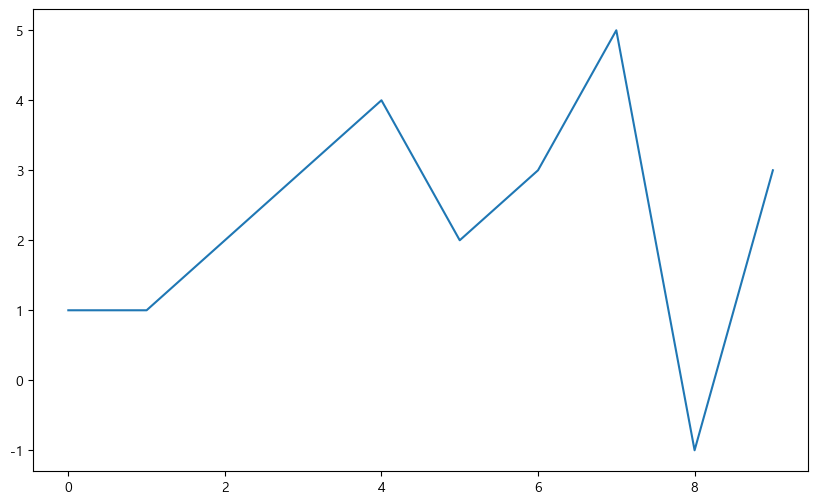

In [176]:
# 그래프 그리기
plt.figure(figsize=(10, 6)) # 그래프 백그라운드 크기 설정
plt.plot([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 1, 2, 3, 4, 2, 3, 5, -1, 3]) # x축 데이터, y축 데이터
plt.show() # 그래프 보여주기

### 예제1: 그래프 기초

#### 삼각함수 그리기
- np.arange(a, b, s) : a부터 b까지 a의 간격으로 데이터 생성
- np.sin(value)

In [177]:
import numpy as np 

t = np.arange(0, 12, 0.01)
y = np.sin(t)

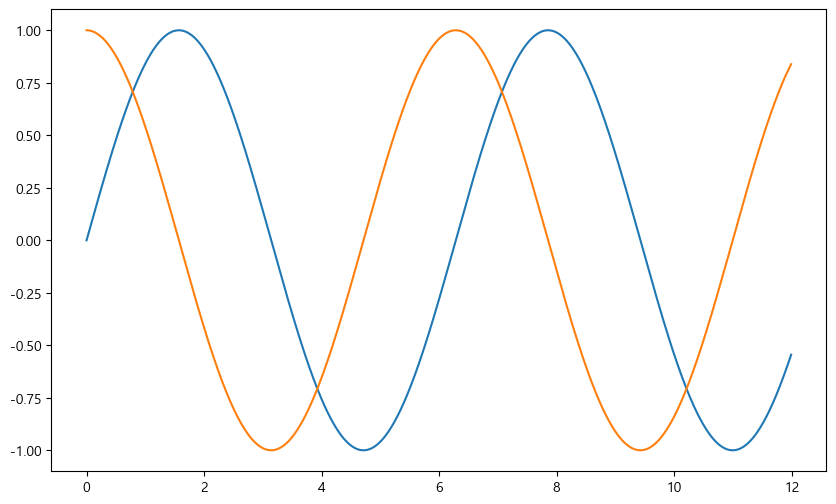

In [178]:
plt.figure(figsize=(10, 6))
plt.plot(t, np.sin(t))
plt.plot(t, np.cos(t))
plt.show()

- 1. 격자무늬 추가 -> grid()
- 2. 그래프 제목 추가 -> title()
- 3. x축, y축 제목 추가 -> xlabel(), ylabel()
- 4. 주황색, 파란색 선 데이터 의미 구분, 범례 추가 -> legend()

In [181]:
def drawGraph():

    plt.figure(figsize=(10, 6))
    plt.plot(t, np.sin(t), label="sin") # 범례 방법 2 
    plt.plot(t, np.cos(t), label="cos") # 범례 방법 2
    plt.grid(True)
    #plt.legend(labels=['sin', 'cos'], loc=2) # 범례 방법 1
    plt.legend(loc=2) # 범례 방법 2
    plt.title("Example of sinewave")
    plt.xlabel("time")
    plt.ylabel("Amplitude")
    plt.show()

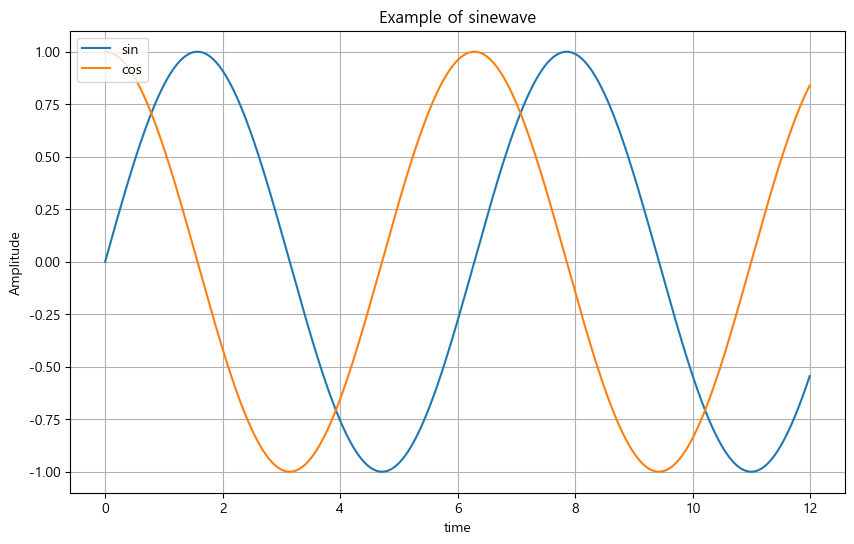

In [182]:
drawGraph()

### 예제2: 그래프 커스텀

In [183]:
t = np.arange(0, 5, 0.5)
t

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

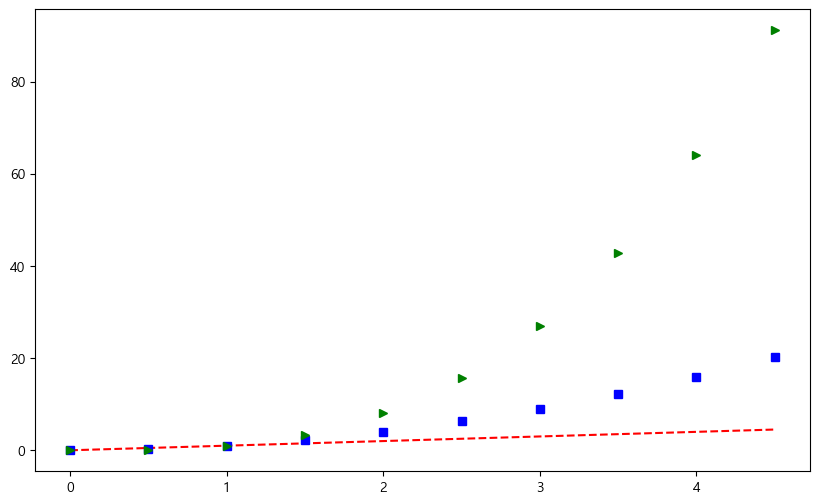

In [184]:
plt.figure(figsize=(10, 6))
plt.plot(t, t, "r--") # red & dashed
plt.plot(t, t ** 2, "bs") # blue & square
plt.plot(t, t ** 3, "g>") # green & left square
plt.show()

In [186]:
# t = [0, 1, 2, 3, 4, 5, 6]
t = list(range(0, 7))
y = [1, 4, 5, 8, 9, 5, 3]

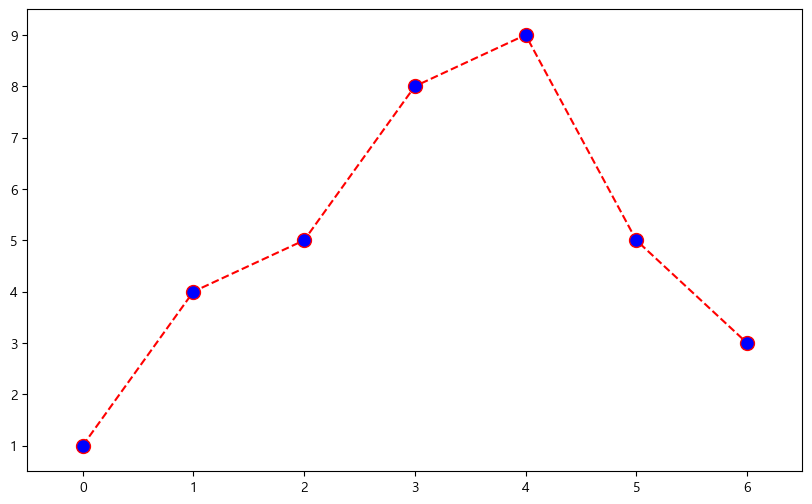

In [187]:
def drawGraph():

    plt.figure(figsize=(10, 6))
    plt.plot(
        t, # x축 데이터
        y, # y축 데이터
        color="red", 
        linestyle="--", 
        marker="o", 
        markerfacecolor="blue",
        markersize=10, 
    )

    plt.xlim([-0.5, 6.5]) # x축 범위
    plt.ylim([0.5, 9.5]) # y축 범위
    plt.show() 
    
drawGraph()

### 예제3: scatter plot

In [188]:
t = np.array(range(0, 10))
y = np.array([9, 8, 7, 9, 8, 3, 2, 4, 3, 4])

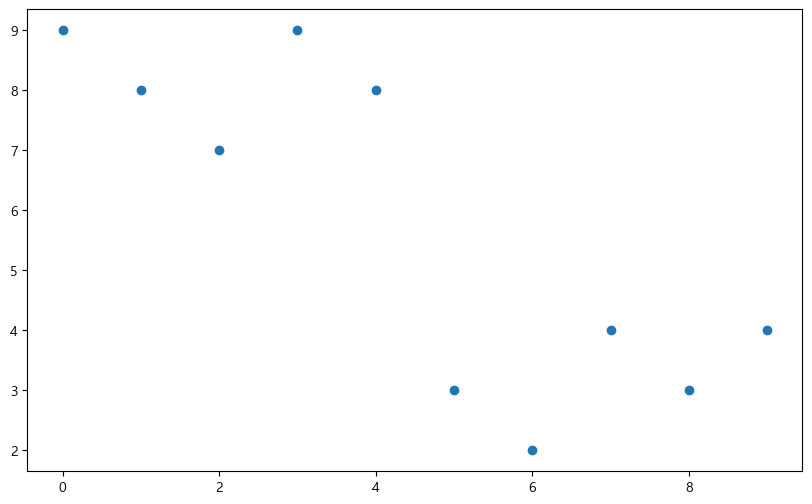

In [189]:
def drawGraph():

    plt.figure(figsize=(10, 6))
    plt.scatter(t, y)
    plt.show()
    
drawGraph()

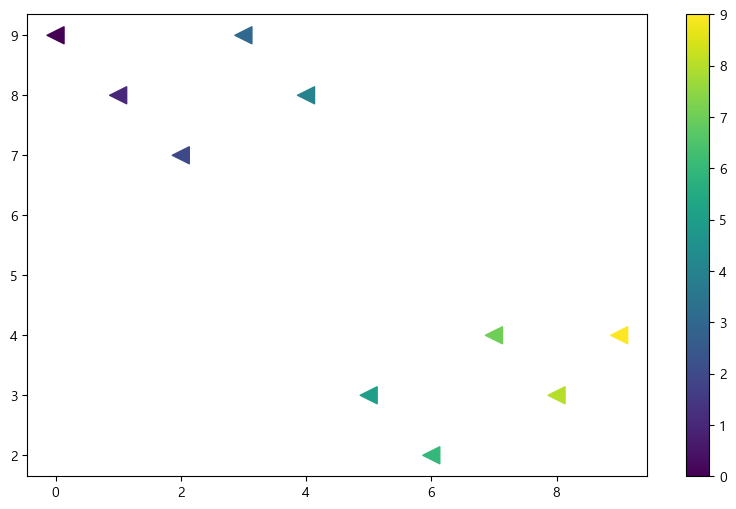

In [190]:
# 컬러맵 사용
colormap = t 

def drawGraph():

    plt.figure(figsize=(10, 6))
    # s : 마커의 사이즈 / c : 마커의 색상 / marker : 마커 모양
    plt.scatter(t, y, s=150, c=colormap, marker="<")
    plt.colorbar()
    plt.show()
    
drawGraph()

### 예제4: Pandas에서 plot 그리기 
- matplotlib 을 가져와서 사용합니다